In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import sys
import torch.optim as optim
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader, TensorDataset
import time

In [2]:
torch.manual_seed(60)

##导入数据
data = pd.read_csv('E:\实验数据\python\RNN_data\data_1.csv')
data = data.values

##转换成array
data_array = data.astype('double')

n_train = 1200
n_test = 1500 - n_train
train_x = data_array[:n_train, :-1]
train_y = data_array[:n_train, [-1]]
test_x = data_array[n_train:, :-1]
test_y = data_array[n_train:, [-1]]

In [3]:
test_x.shape

(300, 6)

In [4]:
##归一化
x_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
y_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

train_X = y_scaler.fit_transform(train_x)
train_Y = y_scaler.fit_transform(train_y)
test_X = y_scaler.fit_transform(test_x)
test_Y = y_scaler.fit_transform(test_y)

In [5]:
seq_len = 50
TIME_STEP = 1200
INPUT_SIZE = 6
HIDDEN_SIZE = 64
LR = 0.01

In [6]:
#转换成tensor
train_X = torch.tensor(train_X, dtype=torch.float32)
train_Y = torch.tensor(train_Y, dtype=torch.float32)
test_X = torch.tensor(test_X, dtype=torch.float32)
test_Y = torch.tensor(test_Y, dtype=torch.float32) 

# 分成batch
#x (time_step, batch , input_size)
train_X = train_X.reshape(seq_len, -1, INPUT_SIZE) 
train_Y = train_Y.reshape(seq_len, -1, 1) 
test_X = test_X.reshape(seq_len, -1, INPUT_SIZE) 
test_Y = test_Y.reshape(seq_len, -1, 1) 

In [7]:
train_X.shape

torch.Size([50, 24, 6])

In [8]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=HIDDEN_SIZE,  # RNN隐藏神经元个数
            num_layers=1,  # RNN隐藏层个数
        )
        self.out = nn.Linear(HIDDEN_SIZE, 1)

    def forward(self, x, h):
        # x (time_step, batch_size, input_size)
        # h (n_layers, batch, hidden_size)
        # out (time_step, batch_size, hidden_size)
        out, h = self.rnn(x, h)
        prediction = self.out(out)
        return prediction, h

In [9]:
rnn = RNN()
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.MSELoss()
h_state = None
print(rnn)

RNN(
  (rnn): RNN(6, 64)
  (out): Linear(in_features=64, out_features=1, bias=True)
)


 迭代次数: 1
train loss: 0.0467655174434185
 迭代次数: 2
train loss: 0.6377626061439514
 迭代次数: 3
train loss: 0.05743396654725075
 迭代次数: 4
train loss: 0.04060826823115349
 迭代次数: 5
train loss: 0.06643787026405334
 迭代次数: 6
train loss: 0.0623357780277729
 迭代次数: 7
train loss: 0.0418328121304512
 迭代次数: 8
train loss: 0.032778963446617126
 迭代次数: 9
train loss: 0.04828992113471031
 迭代次数: 10
train loss: 0.046975962817668915
 迭代次数: 11
train loss: 0.035622596740722656
 迭代次数: 12
train loss: 0.03455579653382301
 迭代次数: 13
train loss: 0.03891722857952118
 迭代次数: 14
train loss: 0.04111897200345993
 迭代次数: 15
train loss: 0.03919777274131775
 迭代次数: 16
train loss: 0.03519217669963837
 迭代次数: 17
train loss: 0.03202557936310768
 迭代次数: 18
train loss: 0.03135198727250099
 迭代次数: 19
train loss: 0.032644521445035934
 迭代次数: 20
train loss: 0.033807575702667236
 迭代次数: 21
train loss: 0.03332468494772911
 迭代次数: 22
train loss: 0.03167204186320305
 迭代次数: 23
train loss: 0.030295196920633316
 迭代次数: 24
train loss: 0.02998804487287998

train loss: 0.028875796124339104
 迭代次数: 212
train loss: 0.028885841369628906
 迭代次数: 213
train loss: 0.028843145817518234
 迭代次数: 214
train loss: 0.028864221647381783
 迭代次数: 215
train loss: 0.028847230598330498
 迭代次数: 216
train loss: 0.02883077599108219
 迭代次数: 217
train loss: 0.028840024024248123
 迭代次数: 218
train loss: 0.028819439932703972
 迭代次数: 219
train loss: 0.028820736333727837
 迭代次数: 220
train loss: 0.028812728822231293
 迭代次数: 221
train loss: 0.028801707550883293
 迭代次数: 222
train loss: 0.028806015849113464
 迭代次数: 223
train loss: 0.028789933770895004
 迭代次数: 224
train loss: 0.028787679970264435
 迭代次数: 225
train loss: 0.028788583353161812
 迭代次数: 226
train loss: 0.028772564604878426
 迭代次数: 227
train loss: 0.028773965314030647
 迭代次数: 228
train loss: 0.028771521523594856
 迭代次数: 229
train loss: 0.028758607804775238
 迭代次数: 230
train loss: 0.028760090470314026
 迭代次数: 231
train loss: 0.028756091371178627
 迭代次数: 232
train loss: 0.028746141120791435
 迭代次数: 233
train loss: 0.02874644659459591
 

train loss: 0.02725561521947384
 迭代次数: 426
train loss: 0.02702808752655983
 迭代次数: 427
train loss: 0.027101827785372734
 迭代次数: 428
train loss: 0.02722378447651863
 迭代次数: 429
train loss: 0.02722778730094433
 迭代次数: 430
train loss: 0.02681095525622368
 迭代次数: 431
train loss: 0.02685931883752346
 迭代次数: 432
train loss: 0.02722666971385479
 迭代次数: 433
train loss: 0.027152294293045998
 迭代次数: 434
train loss: 0.02686653845012188
 迭代次数: 435
train loss: 0.02682165428996086
 迭代次数: 436
train loss: 0.026953449472784996
 迭代次数: 437
train loss: 0.026805324479937553
 迭代次数: 438
train loss: 0.02704586274921894
 迭代次数: 439
train loss: 0.027037138119339943
 迭代次数: 440
train loss: 0.02685420960187912
 迭代次数: 441
train loss: 0.02681795135140419
 迭代次数: 442
train loss: 0.02663971669971943
 迭代次数: 443
train loss: 0.026592327281832695
 迭代次数: 444
train loss: 0.026567677035927773
 迭代次数: 445
train loss: 0.02639760635793209
 迭代次数: 446
train loss: 0.026415271684527397
 迭代次数: 447
train loss: 0.02633003145456314
 迭代次数: 448
tra

train loss: 0.017786063253879547
 迭代次数: 636
train loss: 0.01853976957499981
 迭代次数: 637
train loss: 0.01772732101380825
 迭代次数: 638
train loss: 0.01736045815050602
 迭代次数: 639
train loss: 0.017138628289103508
 迭代次数: 640
train loss: 0.017292262986302376
 迭代次数: 641
train loss: 0.01618816889822483
 迭代次数: 642
train loss: 0.01524690818041563
 迭代次数: 643
train loss: 0.015183938667178154
 迭代次数: 644
train loss: 0.01522842887789011
 迭代次数: 645
train loss: 0.01515760738402605
 迭代次数: 646
train loss: 0.015032055787742138
 迭代次数: 647
train loss: 0.014224190264940262
 迭代次数: 648
train loss: 0.013996019028127193
 迭代次数: 649
train loss: 0.013863622210919857
 迭代次数: 650
train loss: 0.013527045026421547
 迭代次数: 651
train loss: 0.013612515293061733
 迭代次数: 652
train loss: 0.013441778719425201
 迭代次数: 653
train loss: 0.013237102888524532
 迭代次数: 654
train loss: 0.01300969161093235
 迭代次数: 655
train loss: 0.01262849010527134
 迭代次数: 656
train loss: 0.01272136252373457
 迭代次数: 657
train loss: 0.012381480075418949
 迭代次数: 65

train loss: 0.01915137842297554
 迭代次数: 831
train loss: 0.021067636087536812
 迭代次数: 832
train loss: 0.02019430883228779
 迭代次数: 833
train loss: 0.018234848976135254
 迭代次数: 834
train loss: 0.016505775973200798
 迭代次数: 835
train loss: 0.01511338260024786
 迭代次数: 836
train loss: 0.015612462535500526
 迭代次数: 837
train loss: 0.014921624213457108
 迭代次数: 838
train loss: 0.015255064703524113
 迭代次数: 839
train loss: 0.015559225343167782
 迭代次数: 840
train loss: 0.01377876941114664
 迭代次数: 841
train loss: 0.01199729647487402
 迭代次数: 842
train loss: 0.012818154878914356
 迭代次数: 843
train loss: 0.012800752185285091
 迭代次数: 844
train loss: 0.011164944618940353
 迭代次数: 845
train loss: 0.011583534069359303
 迭代次数: 846
train loss: 0.011386029422283173
 迭代次数: 847
train loss: 0.010749486275017262
 迭代次数: 848
train loss: 0.010563847608864307
 迭代次数: 849
train loss: 0.010705399326980114
 迭代次数: 850
train loss: 0.010134613141417503
 迭代次数: 851
train loss: 0.009495400823652744
 迭代次数: 852
train loss: 0.009135802276432514
 迭代次

train loss: 0.0031148430425673723
 迭代次数: 1018
train loss: 0.002758033573627472
 迭代次数: 1019
train loss: 0.0034460313618183136
 迭代次数: 1020
train loss: 0.003022576682269573
 迭代次数: 1021
train loss: 0.003300751792266965
 迭代次数: 1022
train loss: 0.0029306865762919188
 迭代次数: 1023
train loss: 0.003855132730677724
 迭代次数: 1024
train loss: 0.004103973973542452
 迭代次数: 1025
train loss: 0.004766108002513647
 迭代次数: 1026
train loss: 0.005881429184228182
 迭代次数: 1027
train loss: 0.006918978877365589
 迭代次数: 1028
train loss: 0.007012650836259127
 迭代次数: 1029
train loss: 0.005680185277014971
 迭代次数: 1030
train loss: 0.005705683957785368
 迭代次数: 1031
train loss: 0.00498705729842186
 迭代次数: 1032
train loss: 0.005991610232740641
 迭代次数: 1033
train loss: 0.006082870066165924
 迭代次数: 1034
train loss: 0.006820982322096825
 迭代次数: 1035
train loss: 0.005137123633176088
 迭代次数: 1036
train loss: 0.004287693649530411
 迭代次数: 1037
train loss: 0.00496654910966754
 迭代次数: 1038
train loss: 0.004076840355992317
 迭代次数: 1039
train los

train loss: 0.0015848230104893446
 迭代次数: 1215
train loss: 0.001554360263980925
 迭代次数: 1216
train loss: 0.0014829662395641208
 迭代次数: 1217
train loss: 0.00135196337942034
 迭代次数: 1218
train loss: 0.0011953187640756369
 迭代次数: 1219
train loss: 0.0013199971290305257
 迭代次数: 1220
train loss: 0.0012112426338717341
 迭代次数: 1221
train loss: 0.0011794284218922257
 迭代次数: 1222
train loss: 0.0010354634141549468
 迭代次数: 1223
train loss: 0.0010901386849582195
 迭代次数: 1224
train loss: 0.0011515154037624598
 迭代次数: 1225
train loss: 0.0009597907192073762
 迭代次数: 1226
train loss: 0.0009093315456993878
 迭代次数: 1227
train loss: 0.0008506514714099467
 迭代次数: 1228
train loss: 0.0008671347168274224
 迭代次数: 1229
train loss: 0.0009203272056765854
 迭代次数: 1230
train loss: 0.0008927551680244505
 迭代次数: 1231
train loss: 0.0008516953676007688
 迭代次数: 1232
train loss: 0.0008119735866785049
 迭代次数: 1233
train loss: 0.0008207542705349624
 迭代次数: 1234
train loss: 0.0007831641123630106
 迭代次数: 1235
train loss: 0.0008026374271139503
 迭代

train loss: 0.00023850798606872559
 迭代次数: 1401
train loss: 0.00024079426657408476
 迭代次数: 1402
train loss: 0.0002443689154461026
 迭代次数: 1403
train loss: 0.0002369139838265255
 迭代次数: 1404
train loss: 0.0002396172349108383
 迭代次数: 1405
train loss: 0.00023740231699775904
 迭代次数: 1406
train loss: 0.00025574685423634946
 迭代次数: 1407
train loss: 0.000264503265498206
 迭代次数: 1408
train loss: 0.00028262464911676943
 迭代次数: 1409
train loss: 0.0003174388548359275
 迭代次数: 1410
train loss: 0.0004152198671363294
 迭代次数: 1411
train loss: 0.0006126352236606181
 迭代次数: 1412
train loss: 0.001057197223417461
 迭代次数: 1413
train loss: 0.0018017907859757543
 迭代次数: 1414
train loss: 0.0036526790354400873
 迭代次数: 1415
train loss: 0.005069476552307606
 迭代次数: 1416
train loss: 0.004752752836793661
 迭代次数: 1417
train loss: 0.0033964402973651886
 迭代次数: 1418
train loss: 0.0025205747224390507
 迭代次数: 1419
train loss: 0.0016293750377371907
 迭代次数: 1420
train loss: 0.0022682412527501583
 迭代次数: 1421
train loss: 0.002928683301433921


train loss: 0.0008386982372030616
 迭代次数: 1595
train loss: 0.0009025301551446319
 迭代次数: 1596
train loss: 0.0009501344175077975
 迭代次数: 1597
train loss: 0.0006726226420141757
 迭代次数: 1598
train loss: 0.0006583971553482115
 迭代次数: 1599
train loss: 0.00058332848129794
 迭代次数: 1600
train loss: 0.00046649485011585057
 迭代次数: 1601
train loss: 0.000636078417301178
 迭代次数: 1602
train loss: 0.00040816949331201613
 迭代次数: 1603
train loss: 0.0006699366495013237
 迭代次数: 1604
train loss: 0.0008003740222193301
 迭代次数: 1605
train loss: 0.0007758041028864682
 迭代次数: 1606
train loss: 0.0007239581900648773
 迭代次数: 1607
train loss: 0.0005018539377488196
 迭代次数: 1608
train loss: 0.0008017081418074667
 迭代次数: 1609
train loss: 0.000622674182523042
 迭代次数: 1610
train loss: 0.0007272974471561611
 迭代次数: 1611
train loss: 0.0006667337729595602
 迭代次数: 1612
train loss: 0.0007762023597024381
 迭代次数: 1613
train loss: 0.0008469941094517708
 迭代次数: 1614
train loss: 0.0008486974402330816
 迭代次数: 1615
train loss: 0.0013501312350854278
 迭

train loss: 0.0006494403933174908
 迭代次数: 1780
train loss: 0.0004781903699040413
 迭代次数: 1781
train loss: 0.0005106071475893259
 迭代次数: 1782
train loss: 0.0004380155587568879
 迭代次数: 1783
train loss: 0.00040639255894348025
 迭代次数: 1784
train loss: 0.00033895421074703336
 迭代次数: 1785
train loss: 0.00035077621578238904
 迭代次数: 1786
train loss: 0.0003251955786254257
 迭代次数: 1787
train loss: 0.00030740562942810357
 迭代次数: 1788
train loss: 0.0003073500993195921
 迭代次数: 1789
train loss: 0.00026861345395445824
 迭代次数: 1790
train loss: 0.00028729296172969043
 迭代次数: 1791
train loss: 0.00026616521063260734
 迭代次数: 1792
train loss: 0.00022530190472025424
 迭代次数: 1793
train loss: 0.00025657250080257654
 迭代次数: 1794
train loss: 0.00022328784689307213
 迭代次数: 1795
train loss: 0.0002459883689880371
 迭代次数: 1796
train loss: 0.00021046547044534236
 迭代次数: 1797
train loss: 0.00021779115195386112
 迭代次数: 1798
train loss: 0.00019864775822497904
 迭代次数: 1799
train loss: 0.00019864462956320494
 迭代次数: 1800
train loss: 0.000197

train loss: 0.0005063664866611362
 迭代次数: 1965
train loss: 0.0005534239462576807
 迭代次数: 1966
train loss: 0.00045921668061055243
 迭代次数: 1967
train loss: 0.0006299521774053574
 迭代次数: 1968
train loss: 0.0004942592931911349
 迭代次数: 1969
train loss: 0.0005589390639215708
 迭代次数: 1970
train loss: 0.0004641088889911771
 迭代次数: 1971
train loss: 0.0005648283404298127
 迭代次数: 1972
train loss: 0.00034063481143675745
 迭代次数: 1973
train loss: 0.0005037590744905174
 迭代次数: 1974
train loss: 0.00038232505903579295
 迭代次数: 1975
train loss: 0.0004418089520186186
 迭代次数: 1976
train loss: 0.00041009599226526916
 迭代次数: 1977
train loss: 0.0005132340011186898
 迭代次数: 1978
train loss: 0.0004780047747772187
 迭代次数: 1979
train loss: 0.000524201022926718
 迭代次数: 1980
train loss: 0.0004978803335689008
 迭代次数: 1981
train loss: 0.000508216442540288
 迭代次数: 1982
train loss: 0.000485448632389307
 迭代次数: 1983
train loss: 0.0005029528983868659
 迭代次数: 1984
train loss: 0.0004184073186479509
 迭代次数: 1985
train loss: 0.0004921288345940411

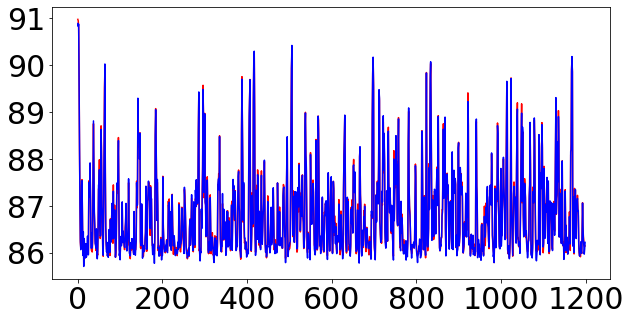

rmse: 0.08507159031974945


In [10]:
epochs = 2000
i = 0
loss_array = []
t1 = time.time()
for epoch in range(epochs):
    i = i+1
    print(" 迭代次数: {}".format(i))      
    prediction, h_state = rnn(train_X, h_state)
    h_state = h_state.detach()
    loss = loss_func(prediction, train_Y)
    loss_array.append(loss.detach().numpy())
    print("train loss: {}".format(loss))
    optimizer.zero_grad() #清空过往梯度
    loss.backward()      #反向传播, 计算当前梯度  
    optimizer.step()     #根据梯度更新网络参数
    
# 画图
num = list(range(n_train))
# 红色是实际，蓝色是预测
plt.figure(1, figsize=(10, 5))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

prediction =  prediction.data.numpy().reshape(-1, 1)
train_Y = np.array(train_Y).reshape(-1, 1)

show_labels = y_scaler.inverse_transform(train_Y)  #反归一化
y = y_scaler.inverse_transform(prediction)

plt.plot(num, show_labels, 'r-')
plt.plot(num, y, 'b-')
plt.draw(); plt.pause(0.05)  

error = show_labels - y
rmse = np.mean(error ** 2) ** 0.5
print("rmse:", rmse.item())

train_time = time.time() - t1

In [11]:
print(h_state.shape)

torch.Size([1, 24, 64])


rmse: 1.5334915570156336
train_time: 12.283856630325317


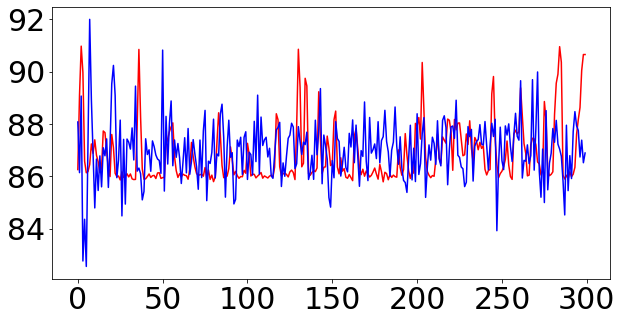

In [12]:
# 测试集效果

h_state = torch.randn(1,6, 64)
prediction, _ = rnn(test_X, h_state)
prediction = prediction.data.numpy().reshape(-1,1)
test_Y = np.array(test_Y).reshape(-1,1)

show_labels = y_scaler.inverse_transform(test_Y)  #反归一化
y = y_scaler.inverse_transform(prediction)


# 画图
num = list(range(n_test))
# 红色是实际，蓝色是预测
plt.figure(1, figsize=(10, 5))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.plot(num, show_labels, 'r-')   #实际值
plt.plot(num, y, 'b-')             #预测值
plt.draw();  

error = show_labels - y
rmse = np.mean(error ** 2) ** 0.5
print("rmse:", rmse.item())
print("train_time:", train_time)

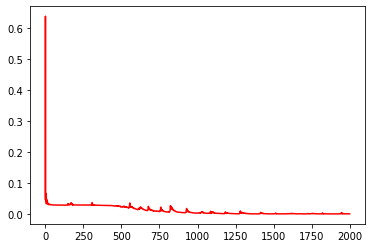

In [13]:
# print(loss_array)
num = list(range(epochs))
plt.plot(num, loss_array, 'r-')